
<font size="8"> **Movie Recommendation 2022**</font>

© Explore Data Science Academy
** **
<br />

<img src="https://explore-datascience.net/images/images_admissions2/main-logo.jpg" width=600 height=100 />

<br />

** **

### Team Members



*   List item
*   List item
*   List item
*   List item
*   List item
*   List item


### Honour Code

We Team Cbb5, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview:
In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

* The aim of this pedict is to provide suggested ratings if a user chooses a specific movie

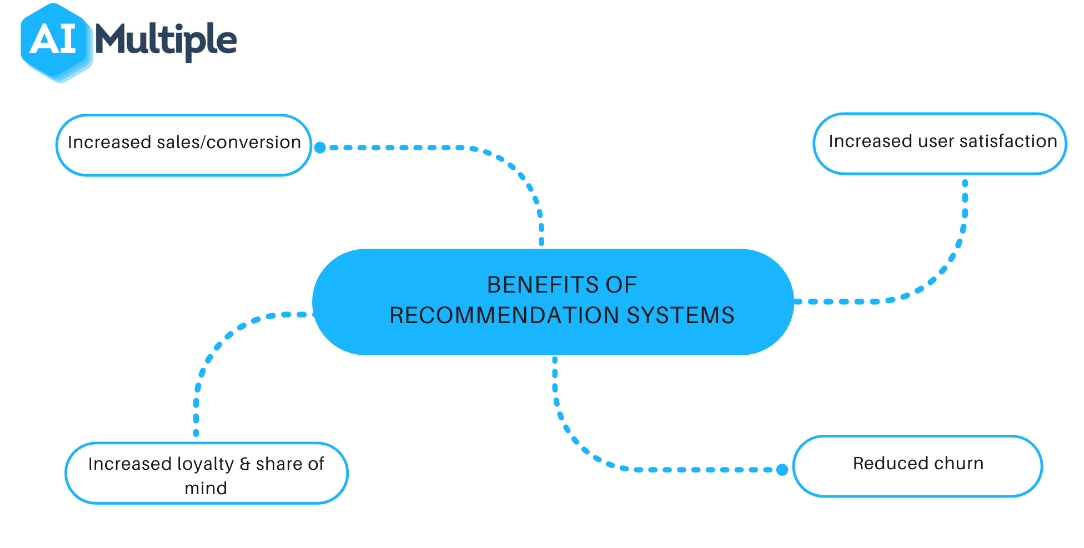

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Understand the Data</a>

<a href=#four>4. Clean Data (EDA)</a>

<a href=#five>5. Data Preprocessing (EDA)</a> 

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Data Engineering</a>

<a href=#eight>8. Model creation </a>

<a href=#nine>9. Model Improvements</a>

<a href=#ten>10. Model Evaluation</a>

<a href=#eleven>11. Discuss chosen methods logic</a>

<a href=#twelve>12. Conclusions</a>

<a href=#thirteen>13. Recommendations</a>




 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

## COMET

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
df_movies = pd.read_csv("movies.csv")
df_train = pd.read_csv("train.csv")
df_test=pd.read_csv('test.csv')
df_tags=pd.read_csv('tags.csv')
df_links=pd.read_csv('links.csv')
df_imdb_data=pd.read_csv('imdb_data.csv')
df_genome_tags=pd.read_csv('genome_tags.csv')
df_genome_scores=pd.read_csv('genome_scores.csv')

In [6]:
#View movies data
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
#View training data
df_train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [12]:
#Shape of training data
df_train.shape

(10000038, 4)

In [13]:
#View test data
df_test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [14]:
#View tags data
df_tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [15]:
#View links data
df_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [16]:
# View imdb data
df_imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [17]:
#View df_genome_tags
df_genome_tags.head(10)

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
5,6,1950s
6,7,1960s
7,8,1970s
8,9,1980s
9,10,19th century


In [18]:
# View df_genome_scores
df_genome_scores.head(10)


,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075
5,1,6,0.14675
6,1,7,0.06350
7,1,8,0.20375
8,1,9,0.20200
9,1,10,0.03075


### Relationships between Data

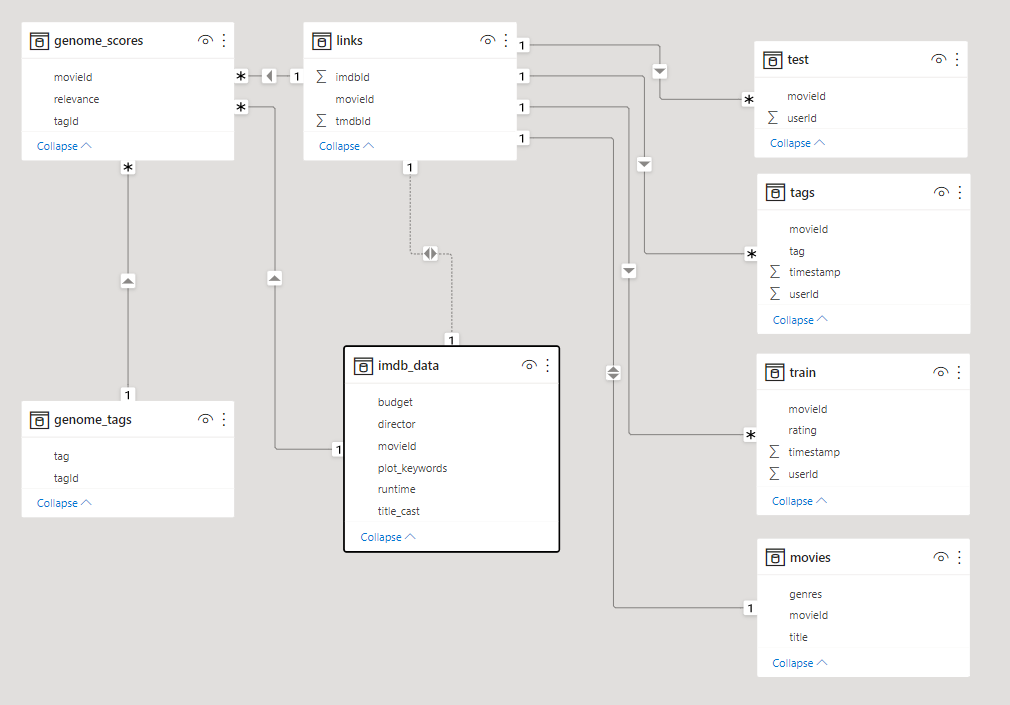

<a id="three"></a>
# 3. Understand the Data

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

Inorder to visualize and understand the train dataset, it is reformatted into a table which shows each movie in rows and the users across the columns. Only 1000 datapoints from the training dataset was used due to the size of the entire dataset being large

In [102]:
df_train[0:10000]

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837
...,...,...,...,...
9995,69529,881,2.0,962600772
9996,20617,1221,5.0,1420561007
9997,136346,2302,3.0,1556676858
9998,85558,50601,3.0,1266171928


In [103]:

train_matrix=df_train.head(1000).pivot(index="movieId",columns="userId",values="rating")

train_matrix=train_matrix.reindex(sorted(train_matrix.columns),axis=1)
train_matrix.fillna(0,inplace=True)





In [99]:
train_matrix.shape

(10201, 54997)

User based colaborative filtering will be used since....

<a id="four"></a>
# 4. Cleaning Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The data is filtered by 2 criteria's i.e.
* To qualify a movie, a minimum of 10 users should have voted a movie.
* To qualify a user, a minimum of 50 movies should have voted by the user.

In [56]:
movie_threshold=10
user_threshold=50

agg_user_votes=df_train.groupby('movieId')['rating'].agg('count')
agg_movie_votes=df_train.groupby('userId')['rating'].agg('count')


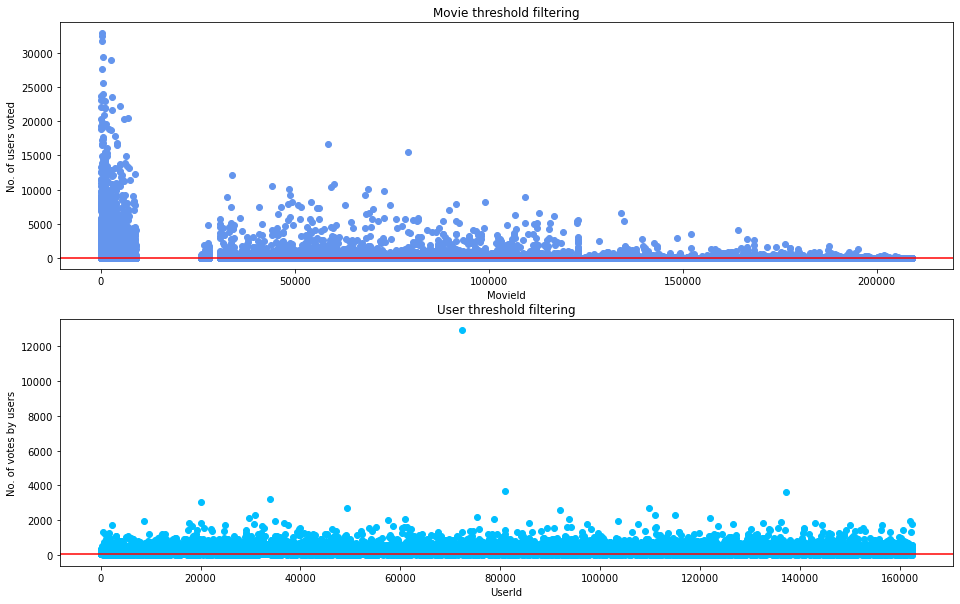

In [77]:
fig,ax=plt.subplots(2,1,figsize=(16,10))

ax[0].scatter(agg_user_votes.index,agg_user_votes,color='cornflowerblue')
ax[0].axhline(y=movie_threshold,color='r')
ax[0].set_xlabel('MovieId')
ax[0].set_ylabel('No. of users voted')
ax[0].set_title('Movie threshold filtering')

ax[1].scatter(agg_movie_votes.index,agg_movie_votes,color='deepskyblue')
ax[1].axhline(y=user_threshold,color='r')
ax[1].set_xlabel('UserId')
ax[1].set_ylabel('No. of votes by users')
ax[1].set_title('User threshold filtering')

plt.show()

<a id="five"></a>
# 5.  Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="six"></a>
# 6. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


<a id="seven"></a>
# 7. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section the data is processed further, creating new features - as identified in the EDA phase. |

---

<a id="eight"></a>
# 8. Model Creation
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, NLP models are created inorder to accurately predict the sentiment of tweets. |

---

Hybrid Model

In [4]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan

<a id="nine"></a>
# 9.  Model Improvements
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="ten"></a>
# 10.  Model Evaluation |
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="eleven"></a>
# 11. Discuss chosen methods logic
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

<a id="twelve"></a>
# 12. Conclusions
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>



<a id="thirteen"></a>
# 13. Recommendations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

# Submission code

* Evaluation metrics for recommendation system
* https://towardsdatascience.com/evaluation-metrics-for-recommender-systems-df56c6611093